#### Task given By : Markytics Organization

**Submitted By: Mr. Lavish Isasare**
    
**Date : 19-07-2021**

Import all required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Check the data, by reading excel file.

In [2]:
Data = pd.read_excel('Frequency of Purchase Analysis Data Question Markytics.xlsx')
Data

,Outlet ID,Brand Name,Sales Value,DATE
0,Outlet 1,Brand 1,395.6906,2018-04-10
1,Outlet 1,Brand 1,395.6906,2018-04-24
2,Outlet 1,Brand 2,724.9328,2018-04-10
3,Outlet 1,Brand 3,150.0466,2018-04-10
4,Outlet 1,Brand 3,300.0932,2018-04-24
...,...,...,...,...
25468,Outlet 23559,Brand 3,150.0466,2018-04-05
25469,Outlet 23560,Brand 1,395.6906,2018-04-05
25470,Outlet 23560,Brand 3,300.0932,2018-04-05
25471,Outlet 23561,Brand 1,395.6906,2018-04-05


Data contain NAN values, but we can simply ignore the NAN value while aggregating 'Sales Value'.


Here, Dropping the 'DATE' column. Which is not useful here.

In [3]:
Data1 = Data.drop(columns='DATE')
Data1

,Outlet ID,Brand Name,Sales Value
0,Outlet 1,Brand 1,395.6906
1,Outlet 1,Brand 1,395.6906
2,Outlet 1,Brand 2,724.9328
3,Outlet 1,Brand 3,150.0466
4,Outlet 1,Brand 3,300.0932
...,...,...,...
25468,Outlet 23559,Brand 3,150.0466
25469,Outlet 23560,Brand 1,395.6906
25470,Outlet 23560,Brand 3,300.0932
25471,Outlet 23561,Brand 1,395.6906


In [4]:
g = Data1.groupby(['Sales Value','Brand Name'])['Outlet ID'].sum().reset_index()
g['count'] = g['Brand Name'].map(Data['Brand Name'].value_counts())
g

,Sales Value,Brand Name,Outlet ID,count
0,92.0316,Brand 2,Outlet 79Outlet 82Outlet 557Outlet 1131Outlet ...,3547
1,96.4464,Brand 10,Outlet 2645Outlet 2748Outlet 3259Outlet 3451Ou...,2863
2,100.2952,Brand 1,Outlet 6309,3665
3,104.5968,Brand 2,Outlet 406Outlet 483,3547
4,108.6720,Brand 1,Outlet 6256,3665
...,...,...,...,...
330,6724.0800,Brand 8,Outlet 2187Outlet 23250Outlet 23252Outlet 2325...,1122
331,6741.2864,Brand 9,Outlet 5823Outlet 6660Outlet 7185Outlet 7192Ou...,5113
332,6876.9000,Brand 5,Outlet 1333Outlet 1339Outlet 1359Outlet 1439Ou...,1496
333,7233.4800,Brand 10,Outlet 23279Outlet 23292,2863


By observing the data, It shows that there corelation between 'Order ID','Brand Name' and 'Sales Value'. So let's pivot this all and aggregate the 'Sales Value' for each 'Brand name' with respect to 'Order ID' table.

In [5]:
Data2 = Data1.pivot_table(index='Outlet ID', columns='Brand Name', values='Sales Value', aggfunc='sum')
Data2

Brand Name,Brand 1,Brand 10,Brand 11,Brand 2,Brand 3,Brand 4,Brand 5,Brand 6,Brand 7,Brand 8,Brand 9
Outlet ID,,,,,,,,,,,
Outlet 1,791.3812,NaN,NaN,724.9328,450.1398,173.0828,NaN,NaN,NaN,NaN,NaN
Outlet 10,1636.7022,NaN,NaN,NaN,150.0466,NaN,NaN,NaN,NaN,NaN,NaN
Outlet 100,NaN,4340.088,NaN,NaN,600.1864,NaN,NaN,NaN,NaN,NaN,2527.9824
Outlet 1000,NaN,4340.088,NaN,NaN,600.1864,NaN,NaN,NaN,1086.0408,NaN,3322.9860
Outlet 1001,NaN,1446.696,NaN,NaN,NaN,NaN,NaN,NaN,1332.1376,NaN,1094.0780
...,...,...,...,...,...,...,...,...,...,...,...
Outlet 995,1007.1970,NaN,NaN,NaN,NaN,NaN,NaN,1285.7256,1406.2836,NaN,NaN
Outlet 996,395.6906,1446.696,NaN,NaN,150.0466,NaN,NaN,NaN,1271.6888,1344.816,1596.9124
Outlet 997,NaN,2893.392,NaN,NaN,NaN,NaN,NaN,NaN,2528.9446,NaN,2188.1560


Values are visible with respect to given condition. But Some outlets 'Sales Value' considered 'NAN' because for that particular date 'Brand Name' was not sold. So, It considered as to 'NAN'.

Randomly check the 'Brand 1' value aggregate 'Total Sales Value' with respect to 'Order ID'.

In [6]:
Data2['Brand 1'].sum()

2291894.0082

Add new row for 'Total Sales Value'.

### Q.1) Solution: Calculate 'Total Sale Value' of each and every 'Brand Name'.

In [7]:
Total_Sales_Value = Data2.sum().rename('Toatal Sales Value')
Frequency_of_Purchase_Analysis_Data_answers = Data2.append(Total_Sales_Value)
Frequency_of_Purchase_Analysis_Data_answers

Brand Name,Brand 1,Brand 10,Brand 11,Brand 2,Brand 3,Brand 4,Brand 5,Brand 6,Brand 7,Brand 8,Brand 9
Outlet ID,,,,,,,,,,,
Outlet 1,7.913812e+02,NaN,NaN,7.249328e+02,450.1398,173.0828,NaN,NaN,NaN,NaN,NaN
Outlet 10,1.636702e+03,NaN,NaN,NaN,150.0466,NaN,NaN,NaN,NaN,NaN,NaN
Outlet 100,NaN,4.340088e+03,NaN,NaN,600.1864,NaN,NaN,NaN,NaN,NaN,2.527982e+03
Outlet 1000,NaN,4.340088e+03,NaN,NaN,600.1864,NaN,NaN,NaN,1.086041e+03,NaN,3.322986e+03
Outlet 1001,NaN,1.446696e+03,NaN,NaN,NaN,NaN,NaN,NaN,1.332138e+03,NaN,1.094078e+03
...,...,...,...,...,...,...,...,...,...,...,...
Outlet 996,3.956906e+02,1.446696e+03,NaN,NaN,150.0466,NaN,NaN,NaN,1.271689e+03,1.344816e+03,1.596912e+03
Outlet 997,NaN,2.893392e+03,NaN,NaN,NaN,NaN,NaN,NaN,2.528945e+03,NaN,2.188156e+03
Outlet 998,1.007197e+03,NaN,NaN,NaN,NaN,NaN,NaN,1.379285e+03,1.382738e+03,NaN,NaN


In [8]:
Frequency_of_Purchase_Analysis_Data_answers.fillna(0)

Brand Name,Brand 1,Brand 10,Brand 11,Brand 2,Brand 3,Brand 4,Brand 5,Brand 6,Brand 7,Brand 8,Brand 9
Outlet ID,,,,,,,,,,,
Outlet 1,7.913812e+02,0.000000e+00,0.0,7.249328e+02,450.1398,173.0828,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Outlet 10,1.636702e+03,0.000000e+00,0.0,0.000000e+00,150.0466,0.0000,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Outlet 100,0.000000e+00,4.340088e+03,0.0,0.000000e+00,600.1864,0.0000,0.00,0.000000e+00,0.000000e+00,0.000000e+00,2.527982e+03
Outlet 1000,0.000000e+00,4.340088e+03,0.0,0.000000e+00,600.1864,0.0000,0.00,0.000000e+00,1.086041e+03,0.000000e+00,3.322986e+03
Outlet 1001,0.000000e+00,1.446696e+03,0.0,0.000000e+00,0.0000,0.0000,0.00,0.000000e+00,1.332138e+03,0.000000e+00,1.094078e+03
...,...,...,...,...,...,...,...,...,...,...,...
Outlet 996,3.956906e+02,1.446696e+03,0.0,0.000000e+00,150.0466,0.0000,0.00,0.000000e+00,1.271689e+03,1.344816e+03,1.596912e+03
Outlet 997,0.000000e+00,2.893392e+03,0.0,0.000000e+00,0.0000,0.0000,0.00,0.000000e+00,2.528945e+03,0.000000e+00,2.188156e+03
Outlet 998,1.007197e+03,0.000000e+00,0.0,0.000000e+00,0.0000,0.0000,0.00,1.379285e+03,1.382738e+03,0.000000e+00,0.000000e+00


In [9]:
file_name = 'Frequency_of_Purchase_Analysis_Data_answers.xlsx'
Frequency_of_Purchase_Analysis_Data_answers.to_excel(file_name, na_rep=0)

Here, you can see +06 = 6 decimal places. ie; the respective number having 6 decimal place. Same for others value too.

**Best way to show output values and their effects, for that we can  use 'heatmap'. It will show everything.**

**Plot heatmap**

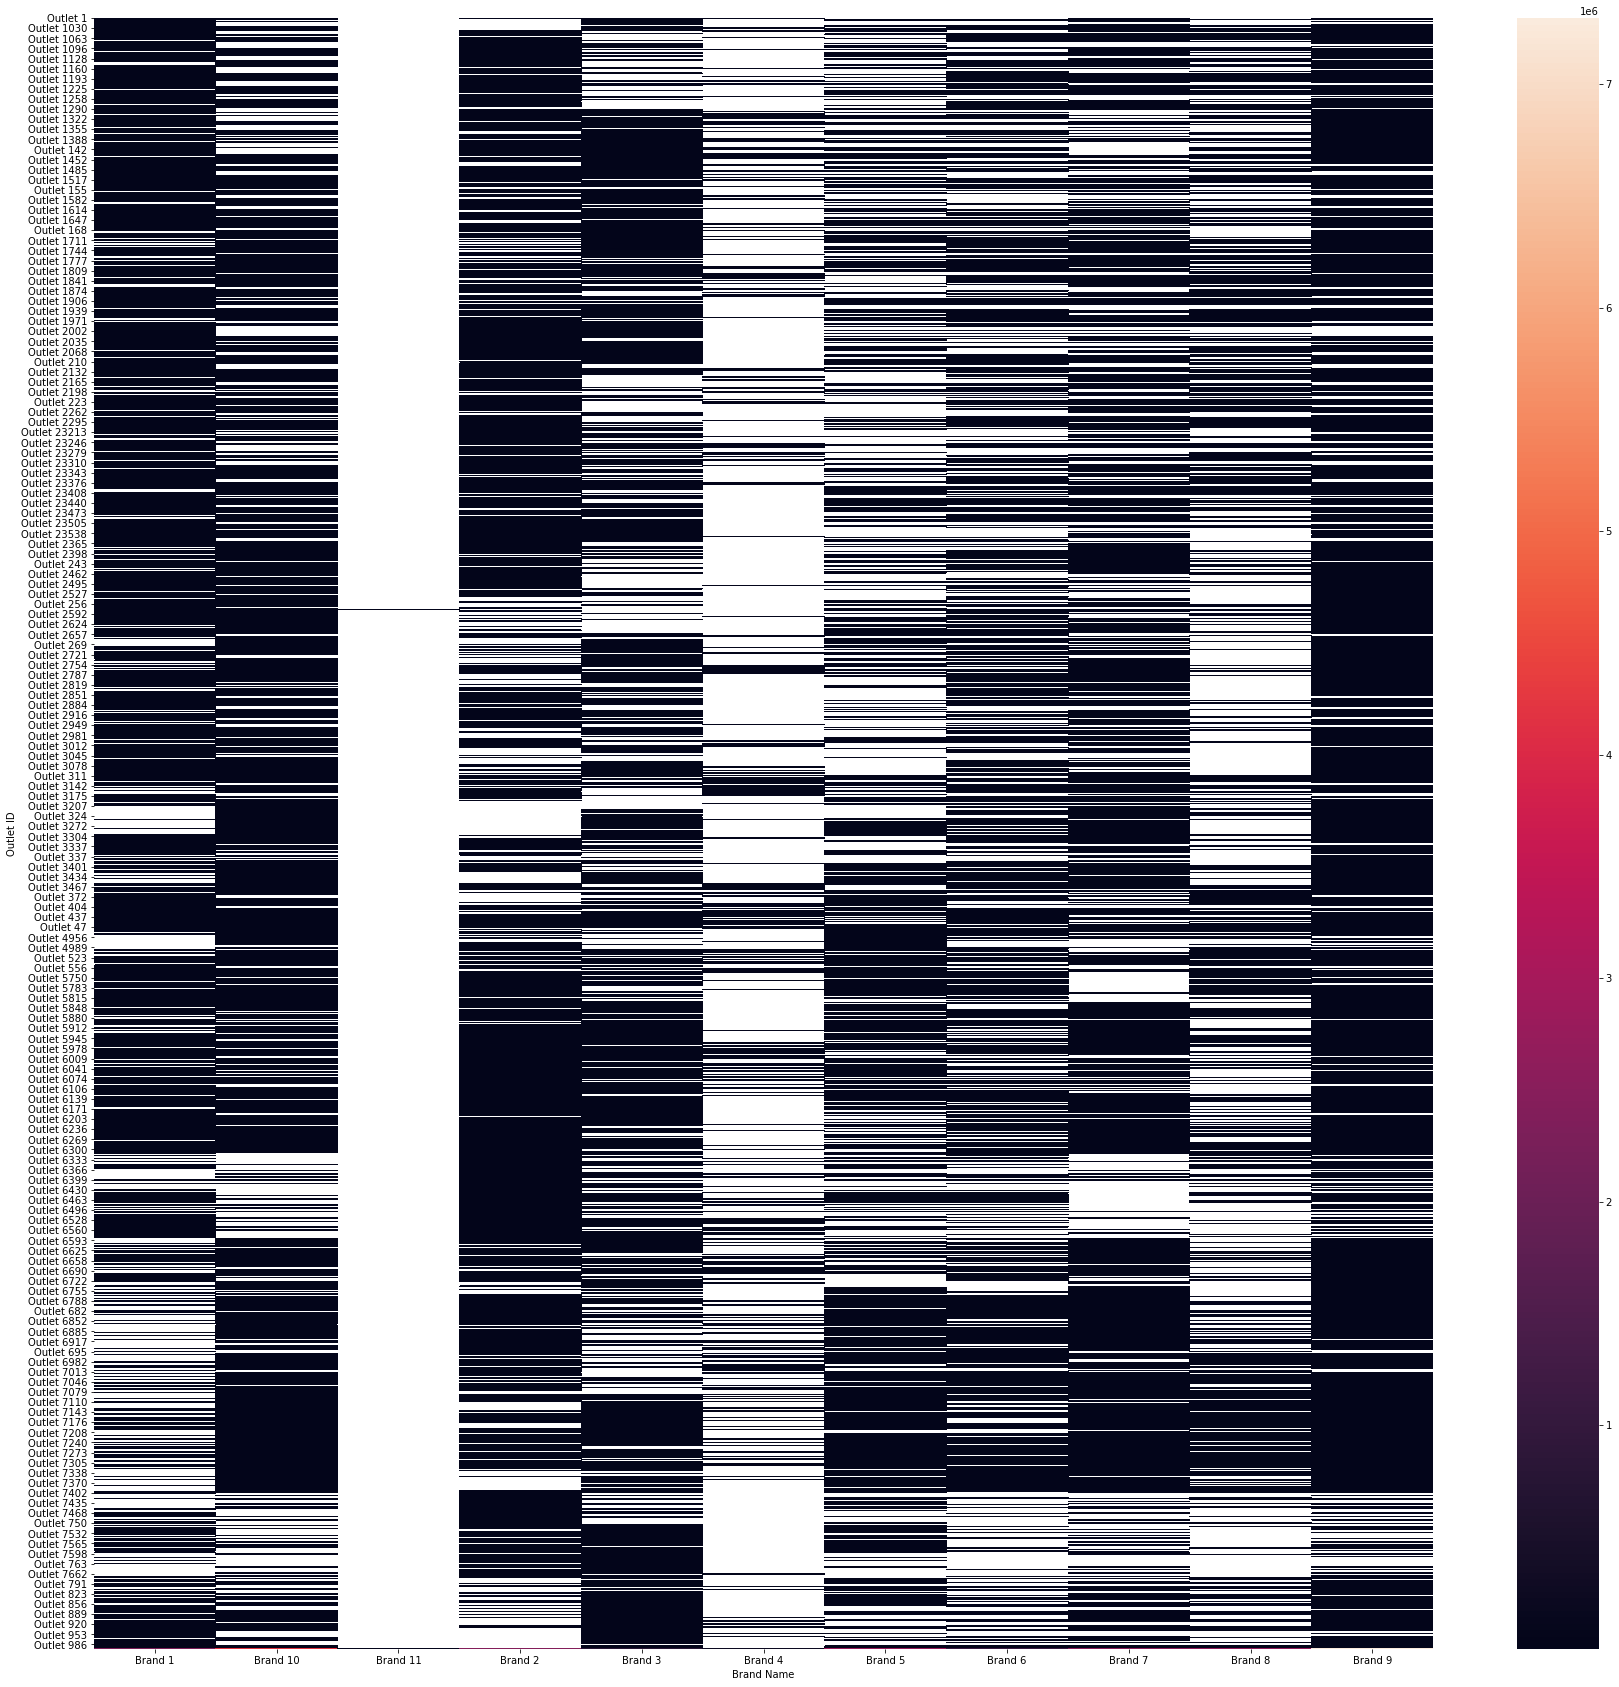

In [10]:
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(Frequency_of_Purchase_Analysis_Data_answers);

Q.2) Solution: The Sales Value increasing or not is depend particular Brand. For example: For Brand 1, at start consumption is higher where in the middle. It quite slow down, and at the end it again boom. All this you can observe by grid of black lines with respect to outlet ID.

Here, I am able to plot the count of all brands with respect to date. As you can see below plot, It's start increasing upto certain limit and then fall and increase and follow this process.

In [11]:
Data

,Outlet ID,Brand Name,Sales Value,DATE
0,Outlet 1,Brand 1,395.6906,2018-04-10
1,Outlet 1,Brand 1,395.6906,2018-04-24
2,Outlet 1,Brand 2,724.9328,2018-04-10
3,Outlet 1,Brand 3,150.0466,2018-04-10
4,Outlet 1,Brand 3,300.0932,2018-04-24
...,...,...,...,...
25468,Outlet 23559,Brand 3,150.0466,2018-04-05
25469,Outlet 23560,Brand 1,395.6906,2018-04-05
25470,Outlet 23560,Brand 3,300.0932,2018-04-05
25471,Outlet 23561,Brand 1,395.6906,2018-04-05


In [12]:
Brand_Sold = Data.pivot_table('Brand Name', 'DATE', aggfunc='count')
Brand_Sold

,Brand Name
DATE,
2018-04-02,591
2018-04-03,754
2018-04-05,925
2018-04-06,965
2018-04-07,980
2018-04-08,32
2018-04-09,1097
2018-04-10,961
2018-04-11,1119


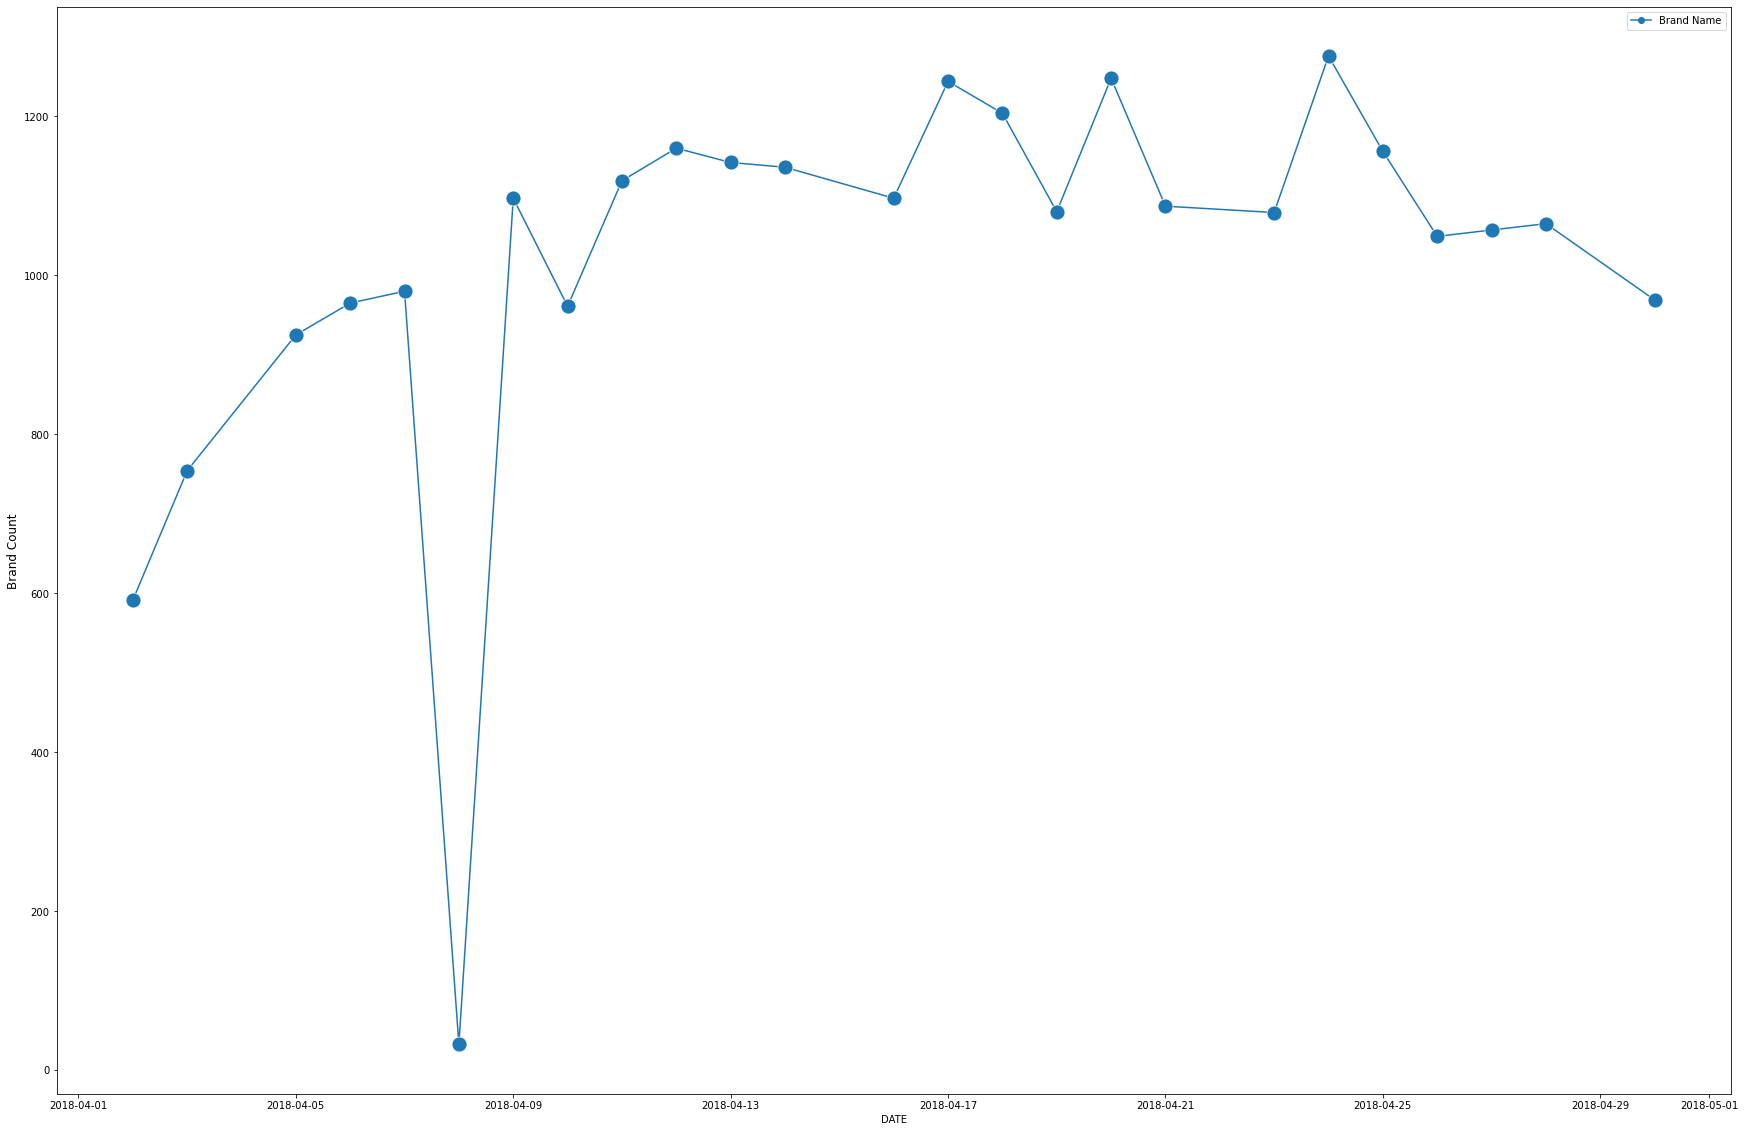

In [18]:
fig, ax = plt.subplots(figsize=(30,20))
plt.ylabel('Brand Count', size = 12)

sns.lineplot(data = Brand_Sold, markers = True, ms = 15);

**Submitted By : Mr. Lavish Isasare**


**Date : 19-07-2021**